In [3]:
#!/usr/bin/env python3
# inagler 16/09/23

import numpy as np          # fundamental package for scientific computing
import xarray as xr
import pop_tools
import gsw                  # compute potential density
import glob
import os

### INITIALISATION

path = '/home/innag3580/phase1_CONDA/'

# Load data events and their temporal location
data = np.genfromtxt(path+'current/events_dens_spg.csv', delimiter=',', names=True, dtype=None)

# Accessing columns by name
member_numbers = data['Index']
events = data['Values']
member_names = np.zeros(len(member_numbers))

# set periods
before = 40*12
after = 20*12

# find file names 
def find_corresponding_file_name(vvel_number_to_find):
    with open(path+'timeseries/order.txt', 'r') as file:
        vvel_list = file.readlines()
    vvel_dict = {filename.split()[1]: int(filename.split()[0]) for filename in vvel_list}
    vvel_filename = None
    for filename in vvel_list:
        if vvel_dict[filename.split()[1]] == vvel_number_to_find:
            vvel_filename = filename.split()[1]  
            break
    return vvel_filename



# SELECT TIME RANGE

In [4]:

### COMPUTATION

for i in range(0, len(member_numbers)):

    # define entire time range for event
    member = find_corresponding_file_name(member_numbers[i])[5:]
    event = events[i]*12
    period_start = event-before
    period_end = event+after
    
    print('computation member '+member+' started')

    # select time range in data arrays
    time = slice(period_start, period_end)

    # open files and take annual means 

    # 2d data
    n_heat_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/n_heat/n_heat_'+member
    ds = xr.open_dataset(n_heat_file).isel(time=time, transport_reg=1, transport_comp=1).resample(time='A').mean(dim='time')

    if 'time_bound' in ds.variables:
        ds = ds.drop_vars('time_bound')

    # save array
    ds.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/n_heat_composite_'+member)
    
    print(member+' saved')

    

computation member 1301.019.nc started
1301.019.nc saved
computation member 1231.001.nc started
1231.001.nc saved
computation member 1281.012.nc started
1281.012.nc saved
computation member 1301.001.nc started
1301.001.nc saved
computation member 1281.017.nc started
1281.017.nc saved
computation member 1231.020.nc started
1231.020.nc saved
computation member 1231.004.nc started
1231.004.nc saved
computation member 1281.010.nc started
1281.010.nc saved
computation member 1281.020.nc started
1281.020.nc saved
computation member 1301.015.nc started
1301.015.nc saved
computation member 1281.015.nc started
1281.015.nc saved
computation member 1231.003.nc started
1231.003.nc saved
computation member 1251.010.nc started
1251.010.nc saved


# COMPUTE 60 YEAR ANNUAL COMPOSITES

In [5]:
n_heat_files = sorted(glob.glob('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/n_heat_composite_*.nc'))

In [6]:
var_years = []
for t in range(60):
    var_year = []
    for i in range(len(n_heat_files)):
        try:
            ds = xr.open_dataset(n_heat_files[i])
        except ValueError as e:
            continue

        ds_file = ds['N_HEAT'].isel(time=t)
        var_year.append(ds_file)

    ds_comp = xr.concat(var_year, dim='file').mean(dim='file')
    var_years.append(ds_comp)

ds_var_annual = xr.concat(var_years, dim='time')

ds_var_annual.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/N_HEATcomposite.nc')

# COMPUTE PERIOD ANOMALY

In [16]:
n_heat_anomalies  = []

for i in range(len(n_heat_files)):
    try:
        ds = xr.open_dataset(n_heat_files[i])
        print(f"{n_heat_files[i]} exists")
        # Do further processing with the dataset 'ds' if needed
    except ValueError as e:
        print(f"Error opening dataset from file {files[i]}: {e}")
        # Handle the exception, for example, continue with the next file
        continue
    
    # TEMP
    period1_avg = ds['N_HEAT'].isel(time=slice(0,35)).mean(dim='time')  
    period2_avg = ds['N_HEAT'].isel(time=slice(45,59)).mean(dim='time')
    difference = period2_avg - period1_avg
    n_heat_anomalies.append(difference)

n_heat_anomaly = xr.concat(n_heat_anomalies, dim='file').mean(dim='file')
n_heat_anomaly.to_netcdf(os.path.expanduser('~/phase1_CONDA/')+'/results/composites/n_heat_anomaly.nc')

/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/n_heat_composite_1231.001.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/n_heat_composite_1231.003.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/n_heat_composite_1231.004.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/n_heat_composite_1231.020.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/n_heat_composite_1251.010.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/n_heat_composite_1281.010.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/n_heat_composite_1281.012.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/n_heat_composite_1281.015.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/n_heat_composite_1281.017.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/n_heat_composite_1281.020.nc exists
/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/n_heat_composite_1301.001.nc exists

Plot average N_HEAT

In [8]:
ds_var_annual = xr.open_dataset('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/N_HEATcomposite.nc')

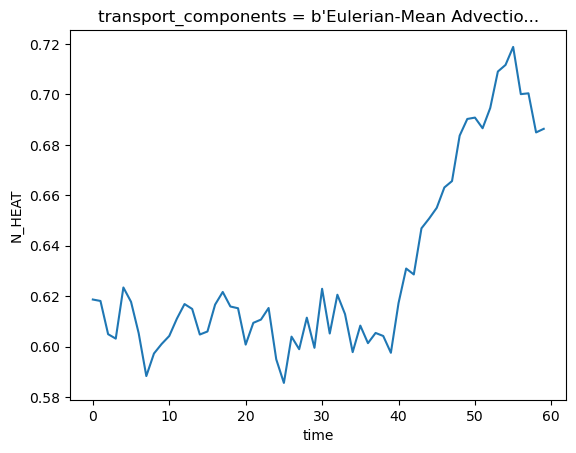

In [12]:
ds_var_annual.N_HEAT.sel(lat_aux_grid=47.432735).plot()

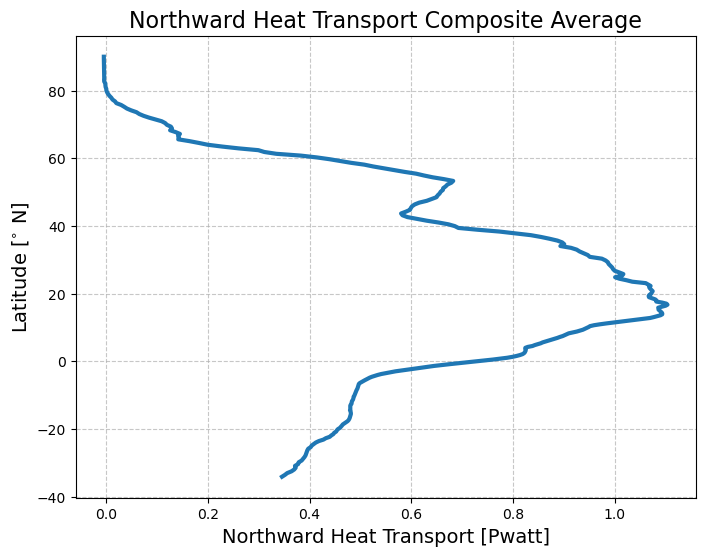

In [22]:
import matplotlib.pyplot as plt


line = ds_var_annual.mean(dim='time').values
lats = ds_var_annual.lat_aux_grid.values

plt.figure(figsize=(8, 6))
plt.plot(line, lats, linewidth=3)
plt.title('Northward Heat Transport Composite Average', fontsize=16)
plt.xlabel('Northward Heat Transport [Pwatt]', fontsize=14)
plt.ylabel('Latitude [$^{\circ}$ N]', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()
#plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'n_heat_average.png', bbox_inches='tight', dpi=300)